# Importing all the required libraries

In [29]:
import glob, re, os, collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# make sure that graphs are embedded into our notebook output
%matplotlib inline

# Saving all the text from inside the directory

In [8]:
directory = "./CD2"

# this dictionary will track our frequencies
docs = {}

# go through each txt file in the directory 
for file in glob.glob(directory + "/*.txt"):
    
    # read file as Latin 1 (remove encoding for UTF-8)
    with open(file, encoding="ISO-8859-1") as f:
        text = f.read();
        
        # tokenize
        tokens = re.findall(r'\b\w[\w-]*\b', text.lower())
        count = len(tokens)
        
        # convert to relative freqs
        relativefreqs = {}
        localfreqs = collections.Counter(tokens) # creates a data structure of words and counts
        
        for word, wordcount in localfreqs.items():
            
            # gather only words with alphabetical characters, discard numbers
            if word.isalpha():
                relativefreqs[word] = wordcount/count
            
        # add this document's relative freqs to our dictionary of all docs
        docs[os.path.basename(file)] = relativefreqs

# Convert frequency to dataframe
df = pd.DataFrame(docs)

# Replace all Nan with 0
df.fillna(0, inplace=True)

# Transpose the data so books are on the y axis
df = df.transpose()

# Writing to csv
df.to_csv("Frequency.csv", na_rep=0) 


# Loading the csv and its manipluation

In [22]:
# Read the csv
df = pd.read_csv('Frequency.csv') 

# Insert a name for the 1st column
df.rename(columns={'Unnamed: 0': 'Text'}, inplace=True) 
df.head(10)

,Text,a,aaron,aback,abandon,abandoned,abandoning,abandonment,abandons,abase,...,zenith,zeno,zephyr,zest,zigzag,zone,zoodle,zooks,â,ï
0,A Christmas Carol.txt,0.024011,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000035
1,A Tale of Two Cities.txt,0.020451,0.00000,0.000007,0.000007,0.000070,0.000007,0.000007,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040614,0.000007
2,Bleak House.txt,0.021099,0.00000,0.000003,0.000020,0.000036,0.000003,0.000000,0.000006,0.000000,...,0.000003,0.000000,0.000000,0.000003,0.000000,0.000006,0.000003,0.000000,0.000000,0.000003
3,David Copperfield.txt,0.020841,0.00000,0.000003,0.000016,0.000035,0.000000,0.000000,0.000000,0.000003,...,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.039825,0.000003
4,Great Expectations.txt,0.020594,0.00000,0.000005,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.041040,0.000005
5,Oliver Twist.txt,0.023242,0.00000,0.000000,0.000006,0.000006,0.000000,0.000000,0.000000,0.000006,...,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
6,Our Mutual Friend.txt,0.020598,0.00004,0.000000,0.000006,0.000014,0.000000,0.000000,0.000003,0.000003,...,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.055993,0.000003
7,The Life And Adventure Of Nicholas Nickleby.txt,0.021035,0.00000,0.000009,0.000006,0.000012,0.000000,0.000003,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.000003,0.051360,0.000003
8,The Pickwick Papers.txt,0.022107,0.00000,0.000003,0.000003,0.000009,0.000003,0.000000,0.000000,0.000000,...,0.000000,0.000003,0.000015,0.000003,0.000000,0.000000,0.000000,0.000000,0.059116,0.000003


In [32]:
words = ["violence", "death" ,"blood", "fight", "attack", "kill", "murder", "die", "dead"]

postivepath = "./postive.txt"

#Open file
with open(postivepath, "r") as file:
    postive = file.read().lower().split("\n")

df2 = df.ix[1:,postive]

type(df2)

df2 = df2.fillna(0.0)

df2.head(10)



,abidance,abidance,abilities,ability,able,above,above-average,abundant,abundance,acceptance,...,worthy,wow,wry,yearning,yearningly,youthful,zeal,zenith,zest,
1,0.0,0.0,0.000007,0.000014,0.000119,0.000161,0.0,0.000028,0.000007,0.000000,...,0.000070,0.000000,0.000000,0.000007,0.0,0.000021,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000011,0.000011,0.000204,0.000142,0.0,0.000008,0.000003,0.000020,...,0.000067,0.000000,0.000003,0.000000,0.0,0.000045,0.000000,0.000003,0.000003,0.0
3,0.0,0.0,0.000027,0.000013,0.000107,0.000149,0.0,0.000003,0.000013,0.000011,...,0.000064,0.000000,0.000000,0.000000,0.0,0.000053,0.000003,0.000000,0.000000,0.0
4,0.0,0.0,0.000015,0.000005,0.000164,0.000159,0.0,0.000000,0.000005,0.000010,...,0.000046,0.000000,0.000000,0.000000,0.0,0.000010,0.000010,0.000000,0.000005,0.0
5,0.0,0.0,0.000012,0.000006,0.000181,0.000274,0.0,0.000000,0.000006,0.000000,...,0.000143,0.000000,0.000006,0.000000,0.0,0.000037,0.000000,0.000006,0.000000,0.0
6,0.0,0.0,0.000006,0.000011,0.000086,0.000168,0.0,0.000011,0.000006,0.000011,...,0.000103,0.000006,0.000000,0.000003,0.0,0.000020,0.000009,0.000000,0.000003,0.0
7,0.0,0.0,0.000003,0.000006,0.000122,0.000162,0.0,0.000000,0.000020,0.000006,...,0.000145,0.000006,0.000006,0.000000,0.0,0.000032,0.000012,0.000000,0.000006,0.0
8,0.0,0.0,0.000003,0.000003,0.000086,0.000175,0.0,0.000000,0.000000,0.000009,...,0.000083,0.000000,0.000006,0.000000,0.0,0.000012,0.000003,0.000000,0.000003,0.0


# Graphing the PCA

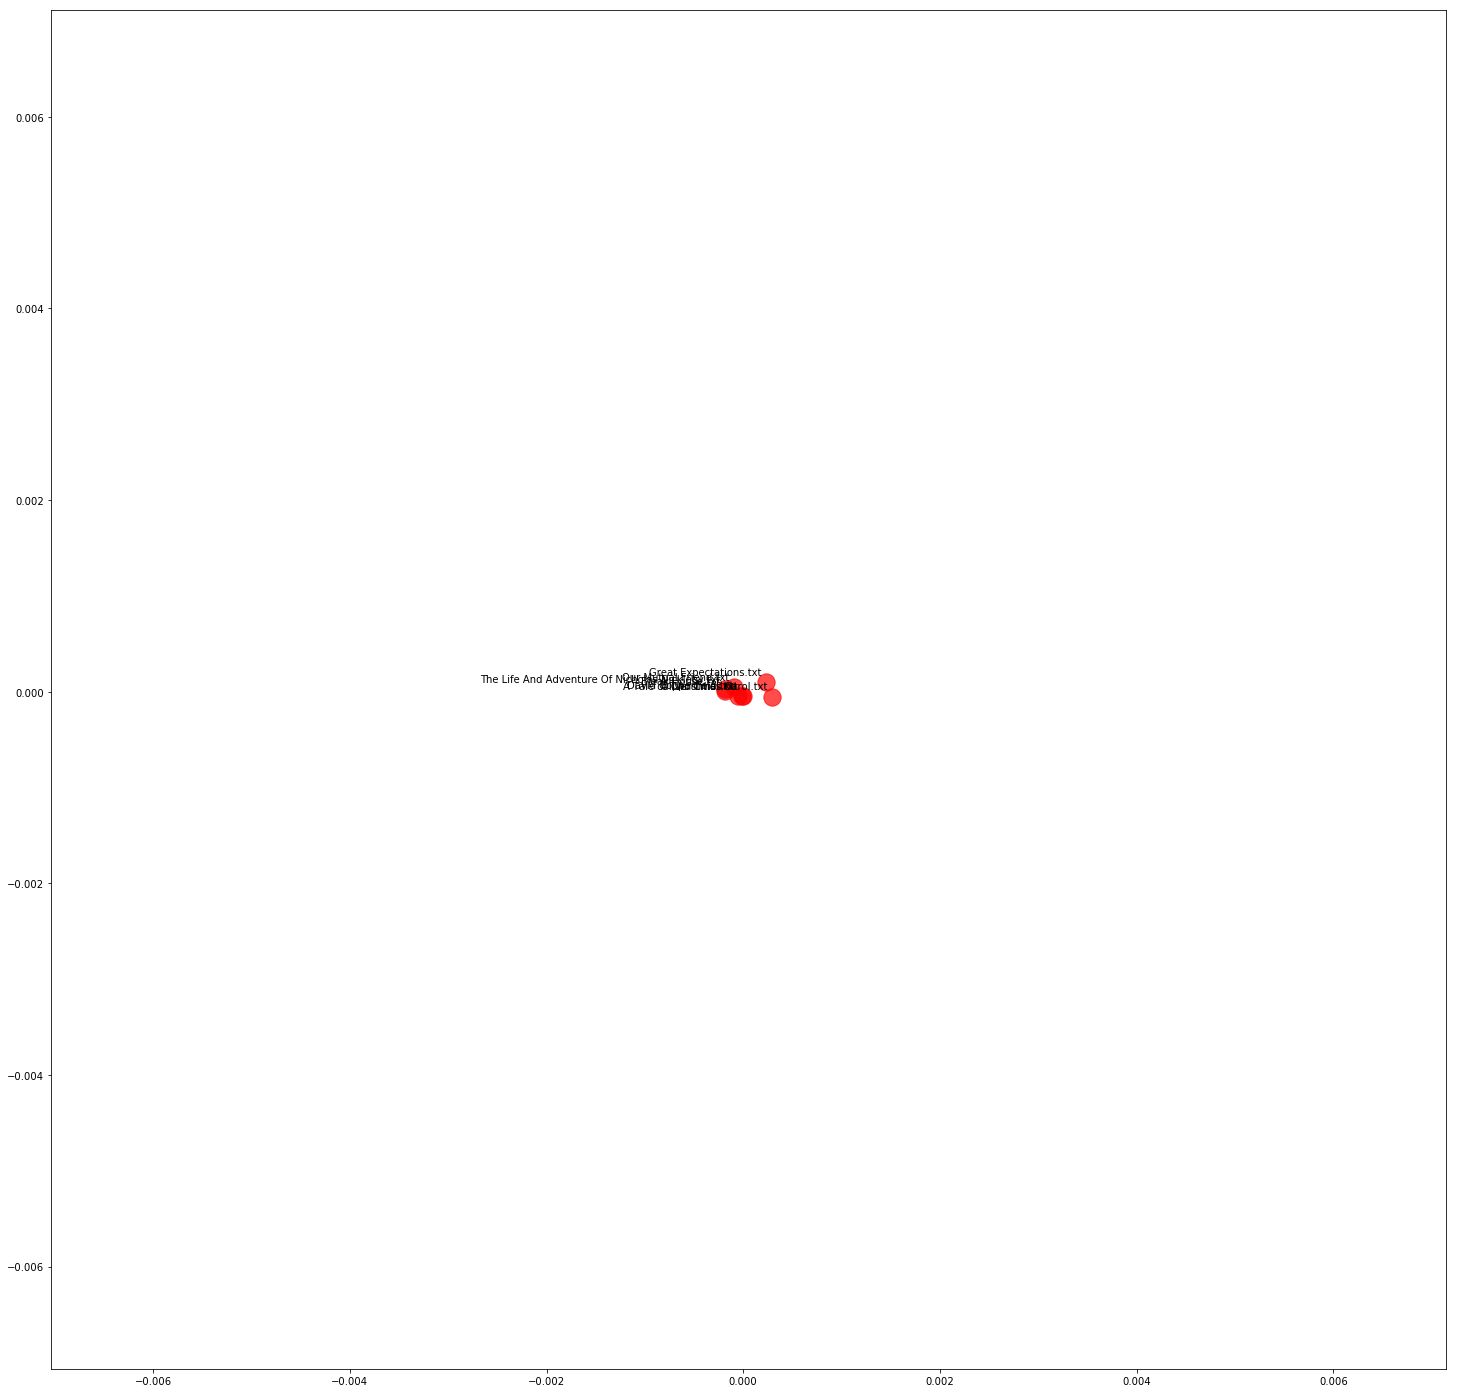

In [14]:
# Set the label
xAxisComp = 0
yAxisComp = 1
labels = df['Text'].tolist()

# Apply scatter plot
plt.figure(figsize=(25, 25))
plt.scatter(X[:,xAxisComp],X[:,yAxisComp],marker='o',
            color='r',
            alpha=0.7,
            s = 300,
            )

# Label the nodes in the graph
for label, x, y in zip(labels, X[:,xAxisComp],X[:,yAxisComp]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-5, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        )

plt.show()